In [2]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'Gaussian/Fourier Transform/tek0006ALL.csv'
# filename = 'TEM20/tek0006ALL.csv'  


# Load the data starting from the "Label" section
# Replace 'yourfile.csv' with the path to your CSV file
time, spectrum = np.loadtxt(filename, delimiter=',', skiprows=21, unpack=True)


# Print to verify the results
print(len(time), len(spectrum))
print("Time Data:", time)
print("CH1 Data:", spectrum)

1000 1000
Time Data: [-2.000e-07 -1.996e-07 -1.992e-07 -1.988e-07 -1.984e-07 -1.980e-07
 -1.976e-07 -1.972e-07 -1.968e-07 -1.964e-07 -1.960e-07 -1.956e-07
 -1.952e-07 -1.948e-07 -1.944e-07 -1.940e-07 -1.936e-07 -1.932e-07
 -1.928e-07 -1.924e-07 -1.920e-07 -1.916e-07 -1.912e-07 -1.908e-07
 -1.904e-07 -1.900e-07 -1.896e-07 -1.892e-07 -1.888e-07 -1.884e-07
 -1.880e-07 -1.876e-07 -1.872e-07 -1.868e-07 -1.864e-07 -1.860e-07
 -1.856e-07 -1.852e-07 -1.848e-07 -1.844e-07 -1.840e-07 -1.836e-07
 -1.832e-07 -1.828e-07 -1.824e-07 -1.820e-07 -1.816e-07 -1.812e-07
 -1.808e-07 -1.804e-07 -1.800e-07 -1.796e-07 -1.792e-07 -1.788e-07
 -1.784e-07 -1.780e-07 -1.776e-07 -1.772e-07 -1.768e-07 -1.764e-07
 -1.760e-07 -1.756e-07 -1.752e-07 -1.748e-07 -1.744e-07 -1.740e-07
 -1.736e-07 -1.732e-07 -1.728e-07 -1.724e-07 -1.720e-07 -1.716e-07
 -1.712e-07 -1.708e-07 -1.704e-07 -1.700e-07 -1.696e-07 -1.692e-07
 -1.688e-07 -1.684e-07 -1.680e-07 -1.676e-07 -1.672e-07 -1.668e-07
 -1.664e-07 -1.660e-07 -1.656e-07 -1.652e

(3.0, 6.0)

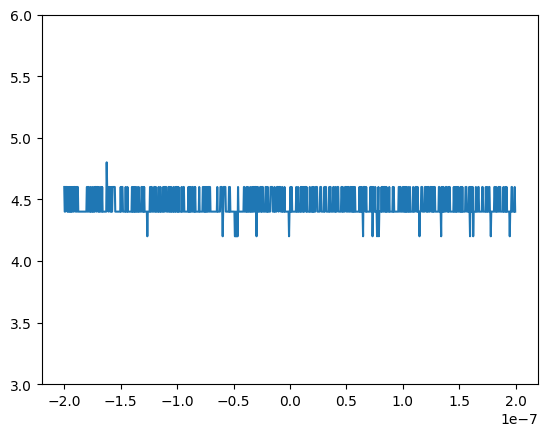

In [3]:
plt.plot(time, spectrum)
plt.ylim(3, 6)

In [4]:
# Standard Deviation 
print(f"Standard Deviation is {np.std(spectrum)}")

Standard Deviation is 0.09991976781398132


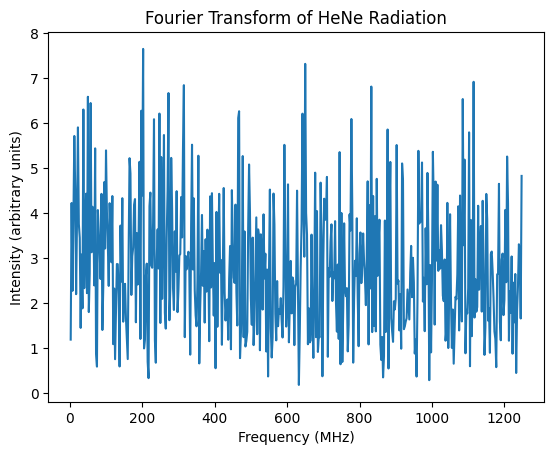

In [5]:
# Fourier transform
spectrum_fft = np.abs(np.fft.fft(spectrum))
freqs = np.fft.fftfreq(len(spectrum), d=(time[1] - time[0]))  # Frequencies for the FFT

freqs /= 10**6  # convert to MHz

# print(len(freqs))

plt.plot(freqs[freqs>0], spectrum_fft[freqs>0])
# plt.yscale('log')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity (arbitrary units)")
# plt.xlim(0,500)
plt.title("Fourier Transform of HeNe Radiation")
plt.savefig("Example2")
# plt.savefig("WhiteLight.png")

In [6]:
# Filter frequencies greater than 40 Hz
filtered_indices = freqs > 40
filtered_frequencies = freqs[filtered_indices]
filtered_spectrum = spectrum_fft[filtered_indices]

# Get the indices of the top 10 frequencies based on the corresponding spectrum values
top_indices = np.argsort(filtered_spectrum)[-10:]  # Get the indices of the top 10 values
top_frequencies = filtered_frequencies[top_indices]

# Print the results
print("Top 10 highest frequencies after 40 Hz:")
for freq in top_frequencies:
    print(round(freq, 2))

Top 10 highest frequencies after 40 Hz:
197.5
57.5
1085.0
50.0
272.5
832.5
315.0
1115.0
650.0
202.5
